# Lab 7: Recurrent Network Atchitectures

### James O. Thomas
### Xiaoxian Jing
### Kuang Yan

1. [Data Selection](#data_selection) <br>
2. [Preparation](#preparation) <br>
  2.1 [Class Variables](#class_varibles) <br>
  2.2 [Metrics](#metrics) <br>
  2.3 [Test-Train Split](#test_train_split) <br>
3. [Modeling](#modeling) <br>
  3.1 [Architectures](#architectures) <br>
  3.2 [Second Recurrent Chain](#second_chain) <br>
  3.3 [Evaluation](#evaluation) <br>
4. [Exceptional Work](#exceptional_work) <br>
  4.1 [Additional Analysis](#additional_analysis) <br>
  4.1 [Simple RNN](#simple_numerics) <br>
  4.2 [Visualize Word Embeddings](#visualize_embeddings) <br>
  4.3 [Novel Text](#novel_text) <br>
5. [Final Thoughts](#final_thoughts) <br>

<a id="data_selection"></a>

# Data Selection

> Select a dataset similarly to lab one:text. That is, the dataset should be text data (or a time series sequence). In terms of generalization performance, it is helpful to have a large dataset of similar sized text documents. It is fine to perform binary classification or multi-class classification. The classification can be "many-to-one" or "many-to-many" sequence classification, whichever you feel more comfortable with. 

<a id="preparation"></a>

# Preparation

<a id="class_variables"></a>
    
## Class Variables

> __[10 points]__ Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed). Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). __Discuss methods of tokenization in your dataset as well as any decisions to force a specific length of sequence.__ 

<a id="metrics"></a>

## Metrics

> __[10 points]__ Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a __detailed argument for why this (these) metric(s) are appropriate__ on your data. That is, why is the metric appropriate for the task (_e.g._, in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

<a id="test_train_split"></a>

## Test-Train Split

> __[10 points]__ Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). __Explain why your chosen method is appropriate or use more than one method as appropriate.__ Convince me that your cross validation method is a realistic mirroring of how an algorithm would be used in practice. 

<a id="modeling"></a>

# Modeling

<a id="architectures"></a>

## Architectures

> __[20 points]__ Investigate at least two different recurrent network architectures (perhaps LSTM and GRU). Be sure to use an embedding layer (pre-trained, from scratch, or both). Adjust hyper-parameters of the networks as needed to improve generalization performance.

<a id="second_chain"></a>

## Second Recurrent Chain

> __[20 points]__ Using the best RNN parameters and architecture, add a second recurrent chain to your RNN. The input to the second chain should be the output sequence of the first chain. Visualize the performance of training and validation sets versus the training iterations. 

<a id="evaluation"></a>

## Evaluation

> __[20 points]__ Use the method of cross validation and evaluation criteria that you argued for at the beginning of the lab. Visualize the results of all the RNNs you trained.  Use proper statistical comparison techniques to determine which method(s) is (are) superior.  

<a id="exceptional_work"></a>

# Exceptional Work

<a id="additional_analysis"></a>

## Additional Analysis

> You have free reigh to provide additional analysis

<a id="simple_numerics"></a>

## Simple RNN (no embeddings)

Out of curiousity, we build a RNN using only the stock/index prices not including all of the complication and overhead associated with including the text information. In principle, the news articles could have an effect on the prices, but we are not sure how big of an effect. We will use the pandas_datareader to access the information from yahoo from 2015 to today. We will look at Tesla (TSLA), Microsoft (MSFT), the Dow Jones Industrial average (DJI), and the S&P 500 (GSPC).

For this part of the project we will train the model on the previous n (where n is a hyperparameter we will explore) days and try to predict the the the change in closing price from the current day to the next day. This will allow us to predict whether or not the price for the stock will increase or decrease the next day and therefore tell us whether we should buy or sell the stock. It appears that the stock prices don't change much overnight and we frankly don't think we can compete with the high-frequency traders during the day.

In [49]:
import pandas_datareader.data as web
import datetime as dt

start = dt.datetime(2008, 8, 8)
end = dt.datetime.now()

# dow https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average
# S&P 500
# Nasdaq

tsla_df = web.DataReader("TSLA", 'yahoo', start, end)
msft_df = web.DataReader("MSFT", 'yahoo', start, end)
dji_df = web.DataReader('^DJI', 'yahoo', start, end) # 'yahoo', 'fred'?
gspc_df = web.DataReader('^GSPC', 'yahoo', start, end) # 'yahoo', 'fred'?

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_stock(df, title=''):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(df['High'], label='High')
    ax.plot(df['Low'], label='Low')
    ax.plot(df['Open'], label='Open')
    ax.plot(df['Close'], label='Close')
    ax.plot(df['Adj Close'], label='Adj Close')
    ax.set(title=title, ylabel='price', xlabel='date')
    plt.xticks(rotation=45)
    l = ax.legend()
    fig.show()

In [51]:
msft_df.head(20)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-08-08,28.230000,27.190001,27.350000,28.129999,80814100.0,21.626917
2008-08-11,28.400000,27.660000,27.860001,27.900000,68743800.0,21.450087
2008-08-12,28.360001,27.580000,27.780001,28.120001,62813000.0,21.619234
2008-08-13,28.500000,27.760000,28.070000,27.910000,51165200.0,21.457777
2008-08-14,28.280001,27.559999,27.820000,27.910000,49732300.0,21.457777
2008-08-15,28.150000,27.580000,27.980000,27.809999,47267400.0,21.380890
2008-08-18,28.049999,27.549999,27.780001,27.690001,38078200.0,21.288635
2008-08-19,27.750000,27.270000,27.540001,27.320000,40332900.0,21.087946
2008-08-20,27.580000,27.170000,27.540001,27.290001,41497200.0,21.064791


C:\ProgramData\Anaconda3\envs\machine_learning_python\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


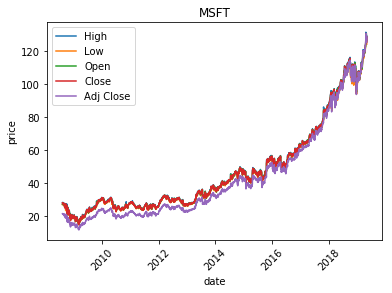

In [52]:
plot_stock(msft_df, title='MSFT')

As an exercise in procrastination, we also filter the data some to remove some of the high frequency fluctuations using Fourier filtering. It should be noted that Fourier filtering assumes the data will repreat itself outside of the domain and therefore has no influene on predicting the future as it is. Rather, it only makes the curves smoother and potentially easier to understand.

In [53]:
import numpy as np

def Fourier_filter(data, filter_percent=0.9, plot=False, plot_title=''):
    f = np.fft.rfft(data) # use rfft because we have real inputs...
    f[int(len(data)*(1-filter_percent)):] = 0
    inv = np.fft.irfft(f)
    
    if plot:
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.plot(data, label='original')
        ax.plot(inv, label='filtered {}'.format(filter_percent))
        ax.legend()
        ax.set(title=plot_title, xlabel='time', ylabel='cost')
        fig.show()
    
    return inv

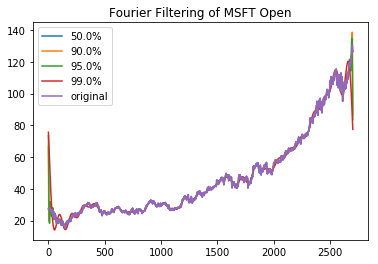

In [54]:
filterings = [0.5, 0.9, 0.95, 0.99]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for filt in filterings:
    res = Fourier_filter(msft_df['Open'].values, filter_percent=filt, plot=False)
    ax.plot(res, label='{}%'.format(filt*100))
ax.plot(msft_df['Open'].values, label='original')
l = ax.legend()
ax.set_title('Fourier Filtering of MSFT Open')
fig.show()

Now back to the real work, we need to preprocess the data some to be able to use it. First, let us make a new target of the change in the closing price from the previoius day. This is a somewhat well behaved parameter.

In [55]:
msft_df['Change'] = msft_df['Close'].diff()
msft_df['Change'] = msft_df['Change'].shift(-1)
msft_df.head()

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2008-08-08,28.230000,27.190001,27.350000,28.129999,80814100.0,21.626917,-0.230000
2008-08-11,28.400000,27.660000,27.860001,27.900000,68743800.0,21.450087,0.220001
2008-08-12,28.360001,27.580000,27.780001,28.120001,62813000.0,21.619234,-0.210001
2008-08-13,28.500000,27.760000,28.070000,27.910000,51165200.0,21.457777,0.000000
2008-08-14,28.280001,27.559999,27.820000,27.910000,49732300.0,21.457777,-0.100000


C:\ProgramData\Anaconda3\envs\machine_learning_python\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\envs\machine_learning_python\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([   2.,   11.,   21.,  106., 1719.,  766.,   55.,   14.,    6.,
           3.]),
 array([-6.09999847, -4.82999878, -3.55999908, -2.28999939, -1.01999969,
         0.25      ,  1.51999969,  2.78999939,  4.05999908,  5.32999878,
         6.59999847]),
 <a list of 10 Patch objects>)

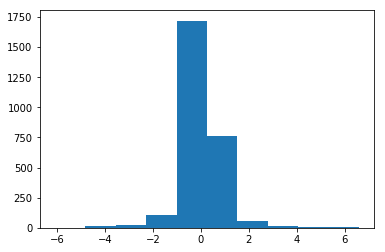

In [56]:
plt.hist(msft_df['Change'])

In [57]:
msft_df.dropna(inplace=True)
msft_df.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Change       0
dtype: int64

Although we expected no na values, it is a good idea to check. Now we can normalize the data. We will use `MinMaxScalar`, but we could also use `StandardScalar` and likely have similar results. Because we only want to fit the transformation on the training data, we will also do the train-test split (80-20 split). Since we want to preserve the time structure of the data, we will explicetly set `shuffle=False` when calling `train_test_split`.

In [58]:
from sklearn.preprocessing import MinMaxScaler

# how do you normalize these? How do you not data snoop?
Data_df = msft_df[[col for col in list(msft_df) if col != 'Change']]
Target_df = msft_df['Change']

# now the normalization
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(Data_df.values)
Y = Target_df.values

In [59]:
print(len(X), len(Y))
print(X.shape)
print(Data_df.iloc[1])

2703 2703
(2703, 6)
High         2.840000e+01
Low          2.766000e+01
Open         2.786000e+01
Close        2.790000e+01
Volume       6.874380e+07
Adj Close    2.145009e+01
Name: 2008-08-11 00:00:00, dtype: float64


In [60]:
# function for making the data sets
def make_datasets(X, Y, length=60):
    if len(X) != len(Y):
        print('you done messed up')
    X_data_list = []
    Y_data_list = []
    for i in range(length, len(X)):
        X_data_list.append(X[i-length:i,:])
        Y_data_list.append(Y[i])
    X_data = np.array(X_data_list)
    Y_data = np.array(Y_data_list)
    return(X_data, Y_data)

In [61]:
X_dataset, Y_dataset = make_datasets(X, Y)

In [62]:
print('X_dataset shape {}'.format(X_dataset.shape))
print('Y_dataset shape {}'.format(Y_dataset.shape))
print('1 {}'.format(X_dataset[1][:10,:]))
print('2 {}'.format(X_dataset[2][:10,:]))

X_dataset shape (2643, 60, 6)
Y_dataset shape (2643,)
1 [[0.11041037 0.11168355 0.10977197 0.11043741 0.19660056 0.08081167]
 [0.11006481 0.11098498 0.10907831 0.11234301 0.17758502 0.08223612]
 [0.1112743  0.11255676 0.11159282 0.11052403 0.14023944 0.08087643]
 [0.10937366 0.11081034 0.10942513 0.11052403 0.13564522 0.08087643]
 [0.10825054 0.11098498 0.11081245 0.10965785 0.12774217 0.08022894]
 [0.10738661 0.11072301 0.10907831 0.10861845 0.09827944 0.07945203]
 [0.10479482 0.10827804 0.10699732 0.10541359 0.10550854 0.07776196]
 [0.10332614 0.10740482 0.10699732 0.10515375 0.10924156 0.07756696]
 [0.10030238 0.10469788 0.10318218 0.10420095 0.11602915 0.07685185]
 [0.10591792 0.10784142 0.10430937 0.10991771 0.12986791 0.08114214]]
2 [[0.11006481 0.11098498 0.10907831 0.11234301 0.17758502 0.08223612]
 [0.1112743  0.11255676 0.11159282 0.11052403 0.14023944 0.08087643]
 [0.10937366 0.11081034 0.10942513 0.11052403 0.13564522 0.08087643]
 [0.10825054 0.11098498 0.11081245 0.1096578

<a id="visualize_embeddings"></a>

## Visualize Word Embeddings

> One idea (__required for 7000 level students__): Use t-SNE (or SVD) to visualize the word embeddings of a subset of words in your vocabulary. Try to interpret what each dimension reflects (in your own words). That is, try to explain what aspect of the language is encoded in the reduced dimensionality embedding. 

<a id="novel_text"></a>

## Novel Text

> Another Idea (NOT required): Try to create a RNN for generating novel text. 